## Deep Dreaming with Inception Model

#### Import necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from libs import gif, nb_utils
%matplotlib inline

c:\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from libs import inception
net = inception.get_inception_model()

#### Graph of Inception model

In [3]:
nb_utils.show_graph(net['graph_def'])

In [4]:
tf.import_graph_def(net['graph_def'], name='inception')

In [5]:
from skimage.data import coffee

In [20]:
def normalize(img, s=0.1):
    '''Normalize the image range for visualization'''
    z = img / np.std(img)
    return np.uint8(np.clip(
        (z - z.mean()) / max(z.std(), 1e-4) * s + 0.5,
        0, 1) * 255)

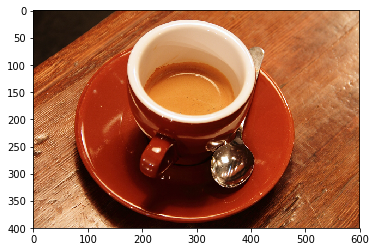

In [6]:
cf = coffee()
plt.imshow(cf)

In [7]:
# Resize image
img = inception.preprocess(cf)
print(img.shape)

(299, 299, 3)


c:\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [8]:
img_4d = img[np.newaxis]
print(img_4d.shape)

(1, 299, 299, 3)


In [9]:
# Rescaling image
img_4d = img_4d / np.mean(img_4d)

#### All the operations of Inception Model

In [10]:
g = tf.get_default_graph()

In [11]:
all_operations = [ops.name for ops in g.get_operations()] 
print(all_operations)

['inception/input', 'inception/conv2d0_w', 'inception/conv2d0_b', 'inception/conv2d1_w', 'inception/conv2d1_b', 'inception/conv2d2_w', 'inception/conv2d2_b', 'inception/mixed3a_1x1_w', 'inception/mixed3a_1x1_b', 'inception/mixed3a_3x3_bottleneck_w', 'inception/mixed3a_3x3_bottleneck_b', 'inception/mixed3a_3x3_w', 'inception/mixed3a_3x3_b', 'inception/mixed3a_5x5_bottleneck_w', 'inception/mixed3a_5x5_bottleneck_b', 'inception/mixed3a_5x5_w', 'inception/mixed3a_5x5_b', 'inception/mixed3a_pool_reduce_w', 'inception/mixed3a_pool_reduce_b', 'inception/mixed3b_1x1_w', 'inception/mixed3b_1x1_b', 'inception/mixed3b_3x3_bottleneck_w', 'inception/mixed3b_3x3_bottleneck_b', 'inception/mixed3b_3x3_w', 'inception/mixed3b_3x3_b', 'inception/mixed3b_5x5_bottleneck_w', 'inception/mixed3b_5x5_bottleneck_b', 'inception/mixed3b_5x5_w', 'inception/mixed3b_5x5_b', 'inception/mixed3b_pool_reduce_w', 'inception/mixed3b_pool_reduce_b', 'inception/mixed4a_1x1_w', 'inception/mixed4a_1x1_b', 'inception/mixed4a_3

In [15]:
x = g.get_tensor_by_name('inception/input:0')
layer = g.get_tensor_by_name('inception/maxpool0:0')

In [16]:
#find the gradient of mean of this layer's activation
gradient = tf.gradients(tf.reduce_mean(layer), x)

img_copy = img_4d.copy()

n_iterations = 50

step = 1

gif_step = 5

imgs= []

c:\python36\lib\site-packages\tensorflow\python\client\session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 

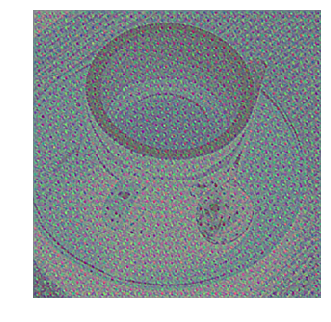

In [21]:
sess= tf.InteractiveSession()
for itr in range(n_iterations):
    print(itr, end=', ')
    #calculate the gradient of the layer we chose with respect to the input image.
    this_res = sess.run(gradient[0], feed_dict={x: img_copy})[0]
    #normalize image
    this_res =  this_res/ (np.max(np.abs(this_res)) + 1e-8)
    #add it back to the input image
    img_copy = img_copy + this_res * step
    
    if itr % gif_step == 0:
        imgs.append(normalize(img_copy[0]))
        
gif.build_gif(imgs, saveto='1-simple-mean_layer.gif')